# Animated Scaterplott of the Gapminder Dataset

In [2]:
# Analysis
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
import imageio


In [3]:
# Read in data
fert = pd.read_csv('./data/fertility.csv', index_col=0)
life = pd.read_excel('./data/life_expectancy.xlsx', index_col=0)
popu = pd.read_excel('./data/population.xlsx', index_col=0)
cont = pd.read_csv('./data/continents.csv', sep= ';')

## EDA

In [4]:
fert.shape, life.shape, popu.shape, cont.shape

((260, 216), (260, 217), (275, 81), (194, 2))

In [5]:
fert.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71


In [6]:
life.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [7]:
popu.head()

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,741688.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,4525691.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0


In [8]:
cont.head() 

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [9]:
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [10]:
life.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

In [11]:
# change column object to integers for merging
fert.columns = fert.columns.astype(int)

In [12]:
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

In [13]:
fert.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'Åland'],
      dtype='object', name='Total fertility rate', length=260)

In [14]:
fert.index.name = 'country'
fert.head(2)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47


In [15]:
fert = fert.reset_index()
fert

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
4,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Zambia,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,...,5.93,5.91,5.88,5.85,5.81,5.77,5.73,5.69,5.64,5.59
257,Zimbabwe,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,...,3.94,3.90,3.85,3.79,3.72,3.64,3.56,3.49,3.41,3.35
258,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Melting Dataframes

In [16]:
fert = fert.melt(
    id_vars='country',
    var_name='year',
    value_name='fertilityrate'
)
fert.head()

,country,year,fertilityrate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99


In [17]:
life.index.name = 'country'
life = life.reset_index()

In [18]:
life = life.melt(
    id_vars='country',
    var_name='year',
    value_name='life_expectancy'
)
life.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


In [19]:
popu.index.name = 'country'

In [20]:
popu = popu.reset_index()

In [21]:
popu = popu.melt(
    id_vars='country',
    var_name='year',
    value_name='Total_population'
)
popu.head()


,country,year,Total_population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000.0
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,410445.0
4,Algeria,1800,2503218.0


## Merging DataFrames together

In [22]:
df = fert.merge(popu)

In [23]:
df = df.merge(life)

In [24]:
df = df.dropna()

In [25]:
df['Total_population'] = round(df['Total_population']/1_000_000, 2)

In [26]:
df.head()

,country,year,fertilityrate,Total_population,life_expectancy
1,Afghanistan,1800,7.00,3.28,28.21
3,Albania,1800,4.60,0.41,35.40
4,Algeria,1800,6.99,2.50,28.82
7,Angola,1800,6.93,1.57,26.98
9,Antigua and Barbuda,1800,5.00,0.04,33.54


In [27]:
cont.head()

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [28]:
df = df.merge(cont)

In [29]:
df.head()

,country,year,fertilityrate,Total_population,life_expectancy,continent
0,Afghanistan,1800,7.0,3.28,28.21,Asia
1,Afghanistan,1810,7.0,3.28,28.11,Asia
2,Afghanistan,1820,7.0,3.32,28.01,Asia
3,Afghanistan,1830,7.0,3.45,27.90,Asia
4,Afghanistan,1840,7.0,3.63,27.80,Asia


## Plotting

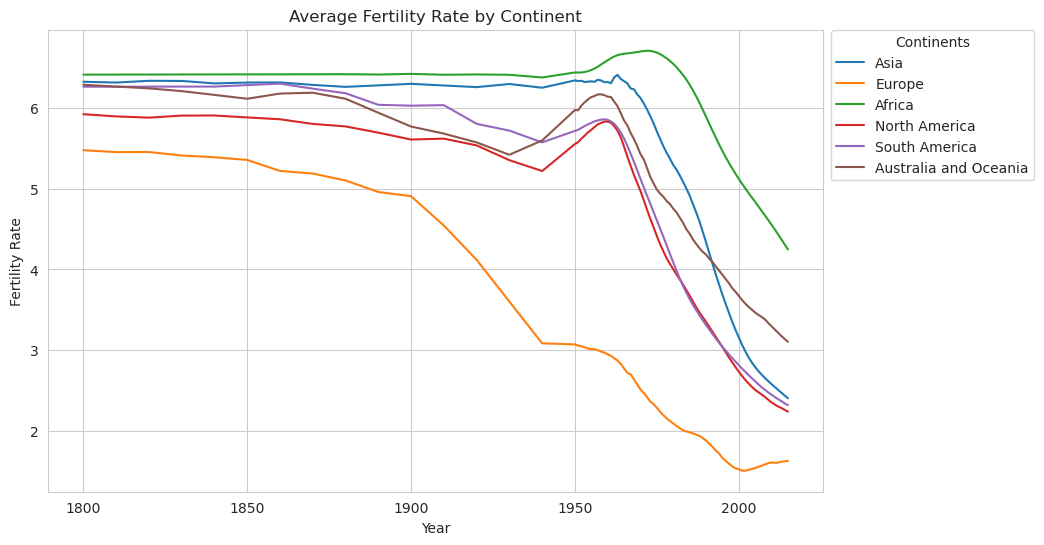

In [44]:
# plotting average fertility rate by continent
plt.figure(figsize=(10,6))
ax = sns.lineplot(
    data=df,
    x='year',
    y='fertilityrate',
    hue='continent',
    errorbar=None
);
         
plt.title('Average Fertility Rate by Continent')
plt.ylabel('Fertility Rate')
plt.xlabel('Year')
h,l = ax.get_legend_handles_labels()
plt.legend(
        h[0:7],
        l[0:7],
        bbox_to_anchor=(1.01, 0.5, 1.005, 0.5),
        loc='upper left',
        borderaxespad=0,
        title='Continents'
        );

#save image
plt.savefig('./images/fertility_by_continent.png', bbox_inches='tight')

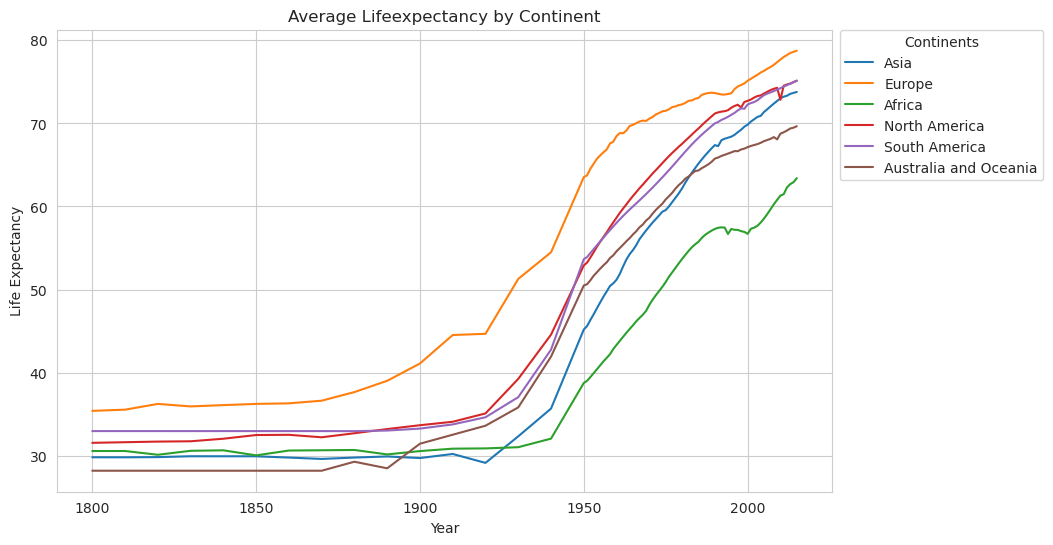

In [45]:
# plotting average life expectancy by continent
plt.figure(figsize=(10,6))
ax = sns.lineplot(
    data=df,
    x='year',
    y='life_expectancy',
    hue='continent',
    errorbar=None
);
         
plt.title('Average Lifeexpectancy by Continent')
plt.ylabel('Life Expectancy')
plt.xlabel('Year')
h,l = ax.get_legend_handles_labels()
plt.legend(
        h[0:7],
        l[0:7],
        bbox_to_anchor=(1.01, 0.5, 1.005, 0.5),
        loc='upper left',
        borderaxespad=0,
        title='Continents'
        );

#save image
plt.savefig('./images/life_expectancy_by_continent.png', bbox_inches='tight')

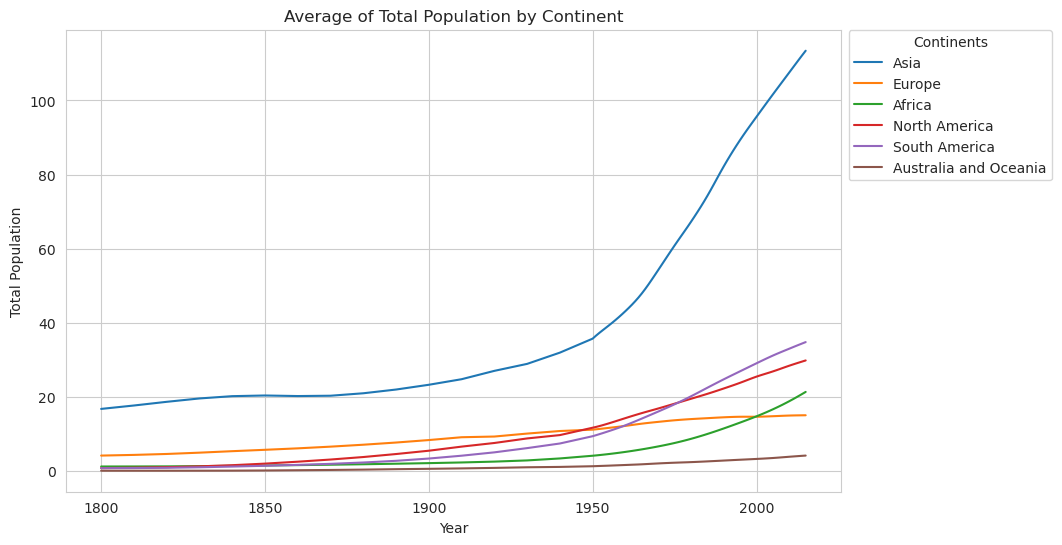

In [46]:
# plotting average population by continent
plt.figure(figsize=(10,6))
ax = sns.lineplot(
    data=df,
    x='year',
    y='Total_population',
    hue='continent',
    errorbar=None
);
         
plt.title('Average of Total Population by Continent')
plt.ylabel('Total Population')
plt.xlabel('Year')
h,l = ax.get_legend_handles_labels()
plt.legend(
        h[0:7],
        l[0:7],
        bbox_to_anchor=(1.01, 0.5, 1.005, 0.5),
        loc='upper left',
        borderaxespad=0,
        title='Continents'
        );

#save image
plt.savefig('./images/total_population_by_continent.png', bbox_inches='tight')

## Create an animated plot of recent Data

In [33]:
df_recent = df[df['year']>1959]
df_recent

,country,year,fertilityrate,Total_population,life_expectancy,continent
25,Afghanistan,1960,7.67,8.99,31.94,Asia
26,Afghanistan,1961,7.67,9.16,32.47,Asia
27,Afghanistan,1962,7.67,9.34,33.01,Asia
28,Afghanistan,1963,7.67,9.53,33.53,Asia
29,Afghanistan,1964,7.67,9.73,34.07,Asia
...,...,...,...,...,...,...
13441,Zimbabwe,2011,3.64,14.26,51.60,Africa
13442,Zimbabwe,2012,3.56,14.57,54.20,Africa
13443,Zimbabwe,2013,3.49,14.90,55.70,Africa
13444,Zimbabwe,2014,3.41,15.25,57.00,Africa


In [34]:
# determine the minimum and maximum values for fertility rate to be used for axes limits
minf = df_recent['fertilityrate'].min()
minf

1.13

In [35]:
maxf = df_recent['fertilityrate'].max()
maxf

9.22

In [36]:
# in plot we can take the minimum value of 10
minl = df_recent['life_expectancy'].min()
minl


13.2

In [37]:
maxl = df_recent['life_expectancy'].max()
maxl

83.3

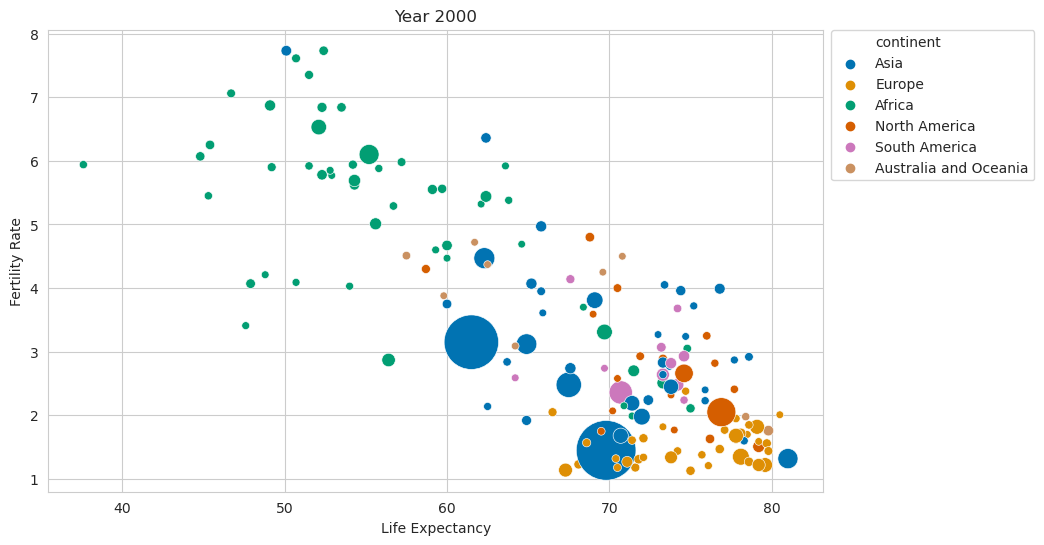

In [38]:
# create first plot of the year 2000
df_subset = df_recent.loc[df['year'] == 2000]

plt.figure(figsize=(10,6))

ax = sns.scatterplot(
    x='life_expectancy',
    y='fertilityrate',
    data=df_subset,
    size=df['Total_population'],
    sizes=(30,2000),
    hue = df['continent'],
    palette = 'colorblind'
    
);

plt.xlabel('Life Expectancy')
plt.ylabel('Fertility Rate')
plt.title('Year 2000')
h,l = ax.get_legend_handles_labels()
plt.legend(
        h[0:7],
        l[0:7],
        bbox_to_anchor=(1.01, 0.5, 1.005, 0.5),
        loc='upper left',
        borderaxespad=0
        );

In [47]:
def scatterplot_generator(year, dataframe):
    plt.figure(figsize=(10,6))
    ax = sns.scatterplot(
        x='life_expectancy',
        y='fertilityrate',
        data=dataframe,
        size=dataframe['Total_population'],
        sizes=(30,2000),
        hue = df['continent'],
        palette = 'colorblind'
    );

    plt.title(f'year {year}')
    plt.axis((10, 90, 0, 10)) 
    h,l = ax.get_legend_handles_labels()
    plt.legend(
            h[0:7],
            l[0:7],
            bbox_to_anchor=(1.01, 0.5, 1.005, 0.5),
            loc='upper left',
            borderaxespad=0,
    );

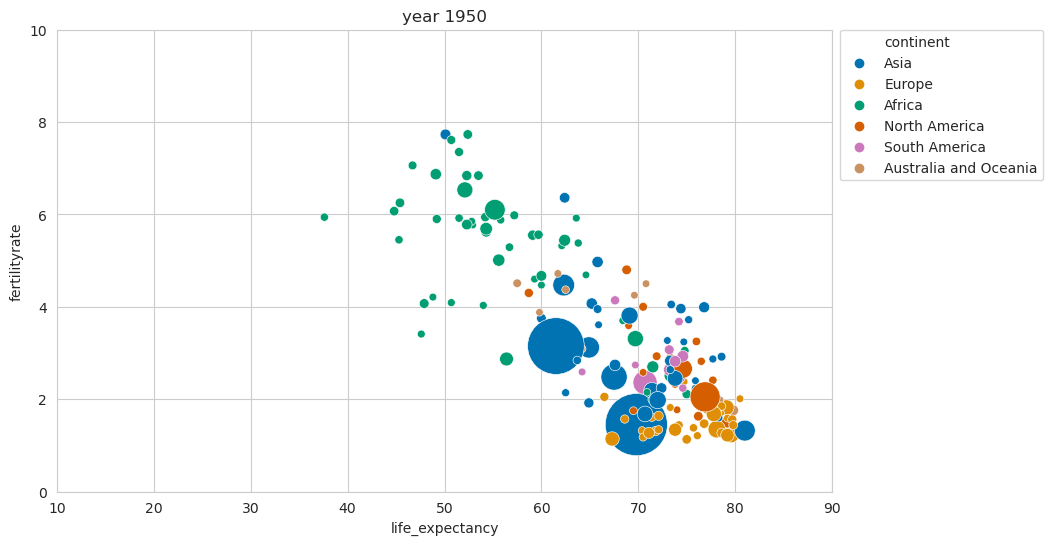

In [48]:
# testing the function
scatterplot_generator(1950, df_subset)

In [50]:
yearly_data_groups = df_recent.groupby('year')

In [51]:
images = []

# tuple unpacking while running for loop
for year, sub_dataframe in yearly_data_groups:
    scatterplot_generator(year, sub_dataframe)
    fname = f'./images/lifeex{year}.png'
    plt.savefig(fname,bbox_inches='tight' )
    images.append(imageio.imread(fname))
    plt.close()

imageio.mimsave('./images/gapminder.gif', images, fps=5)

/tmp/ipykernel_10109/3048399819.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(fname))
/tmp/ipykernel_10109/3048399819.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(fname))
/tmp/ipykernel_10109/3048399819.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(fname))
/tmp/ipykernel_10109/3